In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import projectlib
from projectlib.projlib import download_dataset
import keras
from keras import preprocessing
from keras import layers,models,datasets
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
os.environ["DATASET_PATH"] = "/Users/kousthubhveturi/Downloads/datasetmri"
print(os.environ)

#/Users/kousthubhveturi/Desktop/Research - Summer 2022/projectlib/projlib.py
# we should have 3 types of files, source code (how doing backups), 
# artifacts(any files that are generated using the source files i.e. script downloading from kaggle -> artifact)
# documentation -> keep with code or use google docs, i.e. a README file 

environ({'ELECTRON_RUN_AS_NODE': '1', 'USER': 'kousthubhveturi', 'SECURITYSESSIONID': '186a4', 'COMMAND_MODE': 'unix2003', '__CFBundleIdentifier': 'com.microsoft.VSCode', 'PATH': '/Users/kousthubhveturi/Desktop/Research - Summer 2022/.venv/bin:/Users/kousthubhveturi/Desktop/Research - Summer 2022/.venv/bin:/Users/kousthubhveturi/opt/anaconda3/bin:/Users/kousthubhveturi/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin', 'HOME': '/Users/kousthubhveturi', 'SHELL': '/bin/zsh', 'LaunchInstanceID': '05ADFE20-943D-48A6-8135-27B007F80FB6', '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x0', 'XPC_SERVICE_NAME': '0', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.GBCWjYySyg/Listeners', 'XPC_FLAGS': '0x0', 'LOGNAME': 'kousthubhveturi', 'TMPDIR': '/var/folders/k0/6b_qfrhj0ds5dgf1cvlgg6pw0000gn/T/', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'VSCODE_CWD': '/', 'VSCODE_NLS_CONFIG': '{"locale":"en-us","availableLanguages":{},"_languagePackSupport":true}', 'VSCODE

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


2022-08-08 11:40:23.952127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


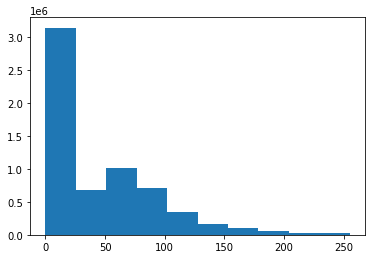

In [3]:
img = "/Users/kousthubhveturi/Downloads/datasetmri/Training"
ds = tf.keras.preprocessing.image_dataset_from_directory(img)
dsclass = ['glioma', 'meningioma', 'notumor', 'pituitary']
img_t = "/Users/kousthubhveturi/Downloads/datasetmri/Testing"
ds_t = tf.keras.preprocessing.image_dataset_from_directory(img_t)
for image_batch,label_batch in ds:
  #print(i)
  #print(len(i))
  #print(i[1])
  image_flat = tf.reshape(image_batch,-1).numpy()
  plt.hist(image_flat)
  break


In [7]:
#tf.keras.applications.resnet50.ResNet50(
 #   include_top=False,
   # weights='imagenet',
   # input_tensor=None,
   # input_shape=None,
   # pooling=None,
#)

model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3),name = "Layer1"))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4))
#model.summary() 
model1 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    classes=1000,
    
)
model1.summary()
#for layer in model.layers:
#  print(layer)
#  print(isinstance(layer,layers.Conv2D))
#print every layer, nested for needed, loop for every input, and output, output can't be earlier than input
#make another function, that computes the receptive field size respect to given input output layer
#took a slice of model.layers[:]
#receptive field - property of a signal, means set of all other signals that can influence the signals

#Rule: If you add an n x n convolution to the front(input side) of the singnal chain, then the receptive fields will overlap, increase by n-1 in each dimension
# rule for N x N pooling operation, the receptive fields will not overlap , k dimension, k * n in each dimension

# convolution vs pooling receptive fields:
# signal chain with receptive field size of K * K, as a given
#If we add an n * n convolution to the front, the resulting singnal chain has receptive field size of k + n-1 in each dimension
#pooling layer
# If we add an n * n pooling to the front, the resulting signal will not overlap, but will have a receptive field size K * n in each dimension
# convolutions add to receptive, pooling scales
#not start beginning, but at the end, work backwards
#print(model.layers[0].name) 
'''
def generate_row(signal_chain):
  
  rfsize = (1,1)
  for layer in reversed(signal_chain):
    if isinstance(layer,layers.Conv2D):
      rfsize = (rfsize[0]+(layer.kernel_size[0])-1,rfsize[1]+(layer.kernel_size[1])-1)
    elif isinstance(layer,layers.MaxPooling2D):
      rfsize = (rfsize[0]*layer.pool_size[0],rfsize[1]*layer.pool_size[1])
    else:
      rfsize = None
      break

  #return triple
  return {"input":signal_chain[0].name,"output":signal_chain[-1].name,"rfsize":rfsize}
for i in range(len(model.layers)):
  for j in range(i+1,len(model.layers)):
    print(generate_row(model.layers[i:j]))
'''


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

'\ndef generate_row(signal_chain):\n  \n  rfsize = (1,1)\n  for layer in reversed(signal_chain):\n    if isinstance(layer,layers.Conv2D):\n      rfsize = (rfsize[0]+(layer.kernel_size[0])-1,rfsize[1]+(layer.kernel_size[1])-1)\n    elif isinstance(layer,layers.MaxPooling2D):\n      rfsize = (rfsize[0]*layer.pool_size[0],rfsize[1]*layer.pool_size[1])\n    else:\n      rfsize = None\n      break\n\n  #return triple\n  return {"input":signal_chain[0].name,"output":signal_chain[-1].name,"rfsize":rfsize}\nfor i in range(len(model.layers)):\n  for j in range(i+1,len(model.layers)):\n    print(generate_row(model.layers[i:j]))\n'

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
acc = model.fit(ds,epochs=1,validation_data=(ds_t))

 11/179 [>.............................] - ETA: 3:38:41 - loss: 12.9072 - accuracy: 0.1989